In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import config_matplotlib

c:\Users\zhant\.conda\envs\sqt\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
demo_data = torch.load('figures/bayesian_illustration/gd_demo_data.pt')

particles_hist = demo_data['particles_hist']
p_weights_hist = demo_data['p_weights_hist']
times = demo_data['times']
signals = demo_data['signals']
times_finer = demo_data['times_finer']
signals_finer = demo_data['signals_finer']
param_true = demo_data['param_true']
param_mean = demo_data['param_mean']
param_std = demo_data['param_std']
likyhd_hist = demo_data['likyhd_hist']
measured_settings = demo_data['measured_settings']
measured_observables = demo_data['measured_observables']
utility = demo_data['utility']

In [3]:
J_grid, D_grid = np.meshgrid(np.linspace(-3,-1,201),np.linspace(-1,0,101))
X_grid = np.concatenate([J_grid[...,None], D_grid[...,None]], axis=-1).reshape(-1,2)

In [4]:
n_iter_before_gd = 29
n_iter_after_gd = n_iter_before_gd + 1

X_before_gd = particles_hist[n_iter_before_gd,:2]
X_weight_before_gd = p_weights_hist[n_iter_before_gd]
kde_before_gd = KernelDensity(kernel="exponential", bandwidth="scott").fit(X_before_gd.T, sample_weight=X_weight_before_gd)
log_dens_before_gd = kde_before_gd.score_samples(X_grid).reshape(J_grid.shape)

X_after_gd = particles_hist[n_iter_after_gd,:2]
X_weight_after_gd = p_weights_hist[n_iter_after_gd]
kde_after_gd = KernelDensity(kernel="exponential", bandwidth="scott").fit(X_after_gd.T, sample_weight=X_weight_after_gd)
log_dens_after_gd = kde_after_gd.score_samples(X_grid).reshape(J_grid.shape)

Text(0, 0.5, 'Parameters')

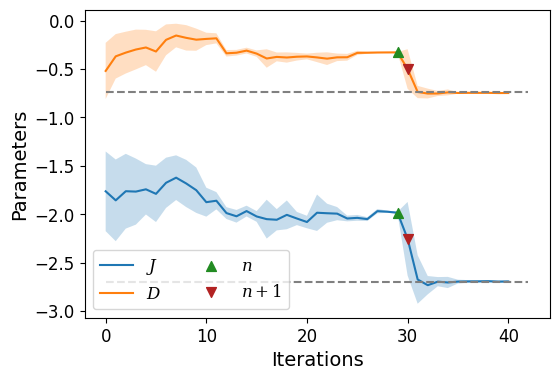

In [5]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(param_mean[:,0], label='$J$')
ax.plot(param_mean[:,1], label='$D$')
ax.fill_between(np.arange(41), 
                param_mean[:,0] - param_std[:,0],
                param_mean[:,0] + param_std[:,0], alpha=0.25)
ax.fill_between(np.arange(41), 
                param_mean[:,1] - param_std[:,1],
                param_mean[:,1] + param_std[:,1], alpha=0.25)
ax.scatter([n_iter_before_gd, n_iter_before_gd], 
           [param_mean[n_iter_before_gd,0], param_mean[n_iter_before_gd,1]], 
           marker='^', s=50, zorder=3, color='forestgreen', label='$n$')
ax.scatter([n_iter_after_gd, n_iter_after_gd], 
           [param_mean[n_iter_after_gd,0], param_mean[n_iter_after_gd,1]], 
           marker='v', s=50, zorder=3, color='firebrick', label='$n+1$')
ax.hlines(param_true[0], 0, 42, linestyles='--', colors='gray')
ax.hlines(param_true[1], 0, 42, linestyles='--', colors='gray')
ax.legend(ncols=2, fontsize=12)
ax.set_xlabel('Iterations', fontsize=14)
ax.set_ylabel('Parameters', fontsize=14)
# fig.savefig('figures/bayesian_illustration/parameters.pdf', bbox_inches='tight')

Text(0, 0.5, '$s(t)$')

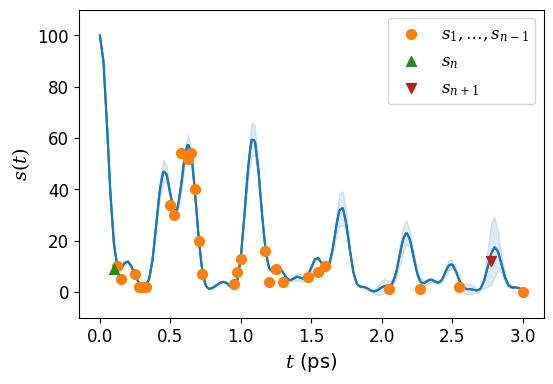

In [6]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(times_finer, signals_finer, zorder=0, color='C0')
ax.plot(times_finer, signals_finer, zorder=0, color='C0')
ax.scatter(measured_settings[:n_iter_before_gd-1], 
           measured_observables[:n_iter_before_gd-1], 
           zorder=2, color='C1', s=50, label='$s_{1}, \ldots, s_{n-1}$')
ax.fill_between(times, 
                signals-utility[n_iter_before_gd]*5, 
                signals+utility[n_iter_before_gd]*5, 
                alpha=0.15, zorder=1, color='C0')
ax.scatter(measured_settings[n_iter_before_gd-1], 
           measured_observables[n_iter_before_gd-1], 
           marker='^', zorder=2, color='forestgreen', s=50, label='$s_{n}$')
ax.scatter(measured_settings[n_iter_before_gd], 
           measured_observables[n_iter_before_gd], 
           marker='v', zorder=3, color='firebrick', s=50, label='$s_{n+1}$')
# ax.vlines(times[np.argmax(data_dict[i_sample]['utility'][n_iter_before])], -100, 100, linestyles='--', color='gray')
ax.set_ylim([-10, 110])
ax.legend(fontsize=12)
ax.set_xlabel('$t$ (ps)', fontsize=14)
ax.set_ylabel('$s(t)$', fontsize=14)
# fig.savefig('figures/bayesian_illustration/st.pdf', bbox_inches='tight')

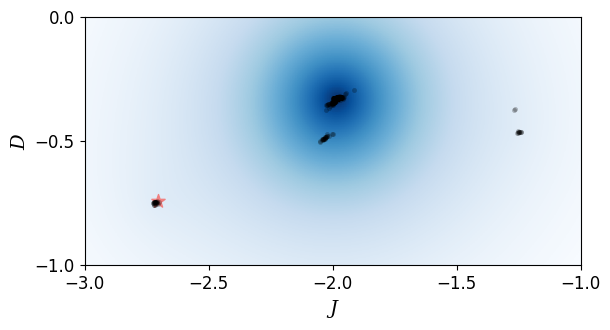

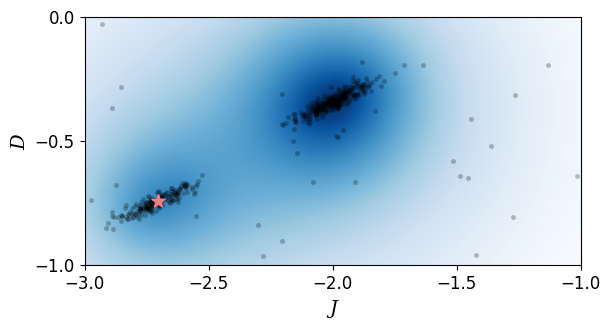

In [7]:
import matplotlib.ticker as plticker
xloc = plticker.MultipleLocator(base=0.5) # this locator puts ticks at regular intervals
yloc = plticker.MultipleLocator(base=0.5) # this locator puts ticks at regular intervals

fig, ax = plt.subplots(1,1)
ax.imshow(np.exp(log_dens_before_gd), extent=[-3, -1, -1, 0], origin='lower', cmap='Blues')
# ax.scatter(X[0], X[1])
ax.scatter(particles_hist[n_iter_before_gd,0], particles_hist[n_iter_before_gd,1], marker='.', color='k', s=50, alpha=0.25, linewidth=0, zorder=100)
ax.scatter(param_true[0], param_true[1], marker='*', color='lightcoral', s=100, zorder=20)
ax.set_aspect('equal')
ax.set_xlim([-3,-1])
ax.set_xlabel('$J$', fontsize=14)
ax.xaxis.set_major_locator(xloc)
ax.set_ylim([-1,0])
ax.set_ylabel('$D$', fontsize=14)
ax.yaxis.set_major_locator(yloc)
# ax.set_title(r'$P_{n}(x)$', fontsize=14)
# fig.savefig('figures/bayesian_illustration/prior.pdf', bbox_inches='tight')

fig, ax = plt.subplots(1,1)
ax.imshow(np.exp(log_dens_after_gd), extent=[-3, -1, -1, 0], origin='lower', cmap='Blues')
ax.scatter(particles_hist[n_iter_after_gd,0], particles_hist[n_iter_after_gd,1], marker='.', color='k', s=50, alpha=0.25, linewidth=0, zorder=10)
ax.scatter(param_true[0], param_true[1], marker='*', color='lightcoral', s=100, zorder=20)
ax.set_aspect('equal')
ax.set_xlim([-3,-1])
ax.set_xlabel('$J$', fontsize=14)
ax.xaxis.set_major_locator(xloc)
ax.set_ylim([-1,0])
ax.set_ylabel('$D$', fontsize=14)
ax.yaxis.set_major_locator(yloc)
# ax.set_title(r'$P_{n+1}(x)$', fontsize=14)
# fig.savefig('figures/bayesian_illustration/posterior.pdf', bbox_inches='tight')

Text(0, 0.5, 'Parameters')

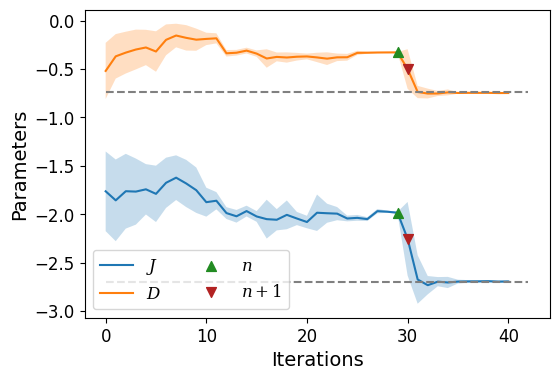

In [8]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(param_mean[:,0], label='$J$')
ax.plot(param_mean[:,1], label='$D$')
ax.fill_between(np.arange(41), 
                param_mean[:,0] - param_std[:,0],
                param_mean[:,0] + param_std[:,0], alpha=0.25)
ax.fill_between(np.arange(41), 
                param_mean[:,1] - param_std[:,1],
                param_mean[:,1] + param_std[:,1], alpha=0.25)
ax.scatter([n_iter_before_gd, n_iter_before_gd], 
           [param_mean[n_iter_before_gd,0], param_mean[n_iter_before_gd,1]], 
           marker='^', s=50, zorder=3, color='forestgreen', label='$n$')
ax.scatter([n_iter_after_gd, n_iter_after_gd], 
           [param_mean[n_iter_after_gd,0], param_mean[n_iter_after_gd,1]], 
           marker='v', s=50, zorder=3, color='firebrick', label='$n+1$')
ax.hlines(param_true[0], 0, 42, linestyles='--', colors='gray')
ax.hlines(param_true[1], 0, 42, linestyles='--', colors='gray')
ax.legend(ncols=2, fontsize=12)
ax.set_xlabel('Iterations', fontsize=14)
ax.set_ylabel('Parameters', fontsize=14)
# fig.savefig('figures/bayesian_illustration/parameters.pdf', bbox_inches='tight')

C:\Users\zhant\AppData\Local\Temp\ipykernel_4044\2589684605.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


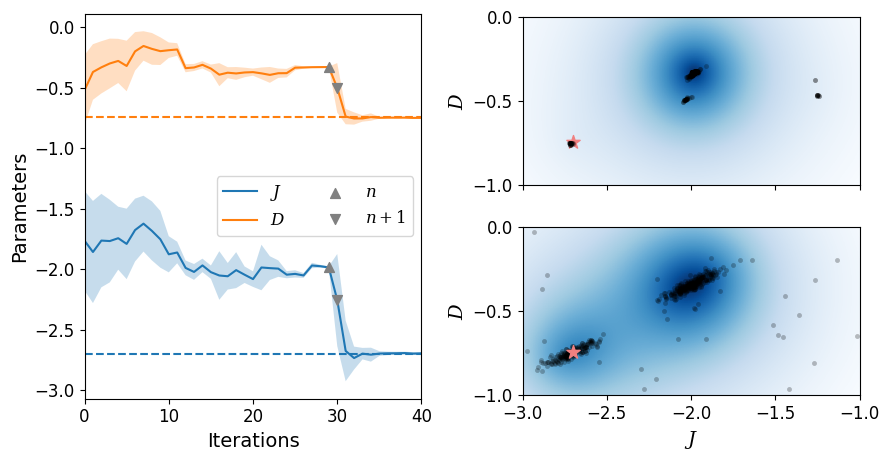

In [10]:
fig = plt.figure(figsize=(10,5))
gs = fig.add_gridspec(nrows=2, ncols=2, wspace=0.3, width_ratios=[1,1])

ax_param = fig.add_subplot(gs[:,0])
ax_param.plot(param_mean[:,0], label='$J$')
ax_param.plot(param_mean[:,1], label='$D$')
ax_param.fill_between(np.arange(41), 
                param_mean[:,0] - param_std[:,0],
                param_mean[:,0] + param_std[:,0], alpha=0.25, linewidth=0.0)
ax_param.fill_between(np.arange(41), 
                param_mean[:,1] - param_std[:,1],
                param_mean[:,1] + param_std[:,1], alpha=0.25, linewidth=0.0)
ax_param.scatter([n_iter_before_gd, n_iter_before_gd], 
           [param_mean[n_iter_before_gd,0], param_mean[n_iter_before_gd,1]], 
           marker='^', s=50, zorder=3, color='gray', label='$n$')
ax_param.scatter([n_iter_after_gd, n_iter_after_gd], 
           [param_mean[n_iter_after_gd,0], param_mean[n_iter_after_gd,1]], 
           marker='v', s=50, zorder=3, color='gray', label='$n+1$')
ax_param.hlines(param_true[0], 0, 42, linestyles='--', colors='C0')
ax_param.hlines(param_true[1], 0, 42, linestyles='--', colors='C1')
ax_param.legend(ncols=2, fontsize=12, loc='center right')
ax_param.set_xlabel('Iterations', fontsize=14)
ax_param.set_ylabel('Parameters', fontsize=14)
ax_param.set_xlim([0,param_mean.shape[0]-1])

ax_before = fig.add_subplot(gs[0,1])
ax_before.imshow(np.exp(log_dens_before_gd), extent=[-3, -1, -1, 0], origin='lower', cmap='Blues')
ax_before.scatter(particles_hist[n_iter_before_gd,0], particles_hist[n_iter_before_gd,1], marker='.', color='k', s=50, alpha=0.25, linewidth=0, zorder=100)
ax_before.scatter(param_true[0], param_true[1], marker='*', color='lightcoral', s=100, zorder=20)
ax_before.set_aspect('equal')
ax_before.set_xlim([-3,-1])
# ax_before.set_xlabel('$J$', fontsize=14)
ax_before.set_xticklabels([])
# ax_before.xaxis.set_major_locator(xloc)
ax_before.set_ylim([-1,0])
ax_before.set_ylabel('$D$', fontsize=14)
ax_before.yaxis.set_major_locator(yloc)

ax_after = fig.add_subplot(gs[1,1])
ax_after.imshow(np.exp(log_dens_after_gd), extent=[-3, -1, -1, 0], origin='lower', cmap='Blues')
ax_after.scatter(particles_hist[n_iter_after_gd,0], particles_hist[n_iter_after_gd,1], marker='.', color='k', s=50, alpha=0.25, linewidth=0, zorder=10)
ax_after.scatter(param_true[0], param_true[1], marker='*', color='lightcoral', s=100, zorder=20)
ax_after.set_aspect('equal')
ax_after.set_xlim([-3,-1])
ax_after.set_xlabel('$J$', fontsize=14)
ax_after.xaxis.set_major_locator(xloc)
ax_after.set_ylim([-1,0])
ax_after.set_ylabel('$D$', fontsize=14)
ax_after.yaxis.set_major_locator(yloc)

fig.tight_layout()
# fig.savefig('figures/bayesian_illustration/grad_desc_dist.pdf', bbox_inches='tight')

In [ ]:
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(10,5))
gs = fig.add_gridspec(nrows=2, ncols=2, wspace=0.3, width_ratios=[1,1])
ax_param = fig.add_subplot(gs[:,0])
ax_before = fig.add_subplot(gs[0,1])


ax_param.plot(param_mean[:,0], label='$J$')
ax_param.plot(param_mean[:,1], label='$D$')
ax_param.fill_between(np.arange(41), 
                param_mean[:,0] - param_std[:,0],
                param_mean[:,0] + param_std[:,0], alpha=0.25, linewidth=0.0)
ax_param.fill_between(np.arange(41), 
                param_mean[:,1] - param_std[:,1],
                param_mean[:,1] + param_std[:,1], alpha=0.25, linewidth=0.0)
ax_param.scatter([n_iter_before_gd, n_iter_before_gd], 
           [param_mean[n_iter_before_gd,0], param_mean[n_iter_before_gd,1]], 
           marker='^', s=50, zorder=3, color='gray', label='$n$')
ax_param.scatter([n_iter_after_gd, n_iter_after_gd], 
           [param_mean[n_iter_after_gd,0], param_mean[n_iter_after_gd,1]], 
           marker='v', s=50, zorder=3, color='gray', label='$n+1$')
ax_param.hlines(param_true[0], 0, 42, linestyles='--', colors='C0')
ax_param.hlines(param_true[1], 0, 42, linestyles='--', colors='C1')
ax_param.legend(ncols=2, fontsize=12, loc='center right')
ax_param.set_xlabel('Iterations', fontsize=14)
ax_param.set_ylabel('Parameters', fontsize=14)
ax_param.set_xlim([0,param_mean.shape[0]-1])


ax_before.imshow(np.exp(log_dens_before_gd), extent=[-3, -1, -1, 0], origin='lower', cmap='Blues')
ax_before.scatter(particles_hist[n_iter_before_gd,0], particles_hist[n_iter_before_gd,1], marker='.', color='k', s=50, alpha=0.25, linewidth=0, zorder=100)
ax_before.scatter(param_true[0], param_true[1], marker='*', color='lightcoral', s=100, zorder=20)
ax_before.set_aspect('equal')
ax_before.set_xlim([-3,-1])
# ax_before.set_xlabel('$J$', fontsize=14)
ax_before.set_xticklabels([])
# ax_before.xaxis.set_major_locator(xloc)
ax_before.set_ylim([-1,0])
ax_before.set_ylabel('$D$', fontsize=14)
ax_before.yaxis.set_major_locator(yloc)

ax_after = fig.add_subplot(gs[1,1])
ax_after.imshow(np.exp(log_dens_after_gd), extent=[-3, -1, -1, 0], origin='lower', cmap='Blues')
ax_after.scatter(particles_hist[n_iter_after_gd,0], particles_hist[n_iter_after_gd,1], marker='.', color='k', s=50, alpha=0.25, linewidth=0, zorder=10)
ax_after.scatter(param_true[0], param_true[1], marker='*', color='lightcoral', s=100, zorder=20)
ax_after.set_aspect('equal')
ax_after.set_xlim([-3,-1])
ax_after.set_xlabel('$J$', fontsize=14)
ax_after.xaxis.set_major_locator(xloc)
ax_after.set_ylim([-1,0])
ax_after.set_ylabel('$D$', fontsize=14)
ax_after.yaxis.set_major_locator(yloc)

fig.tight_layout()